# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [ ]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    array = np.array(x)
    minimum = np.min(array)
    maximum = np.max(array)
    min_max = np.vectorize(lambda v: (v - minimum) / (maximum - minimum))
    return min_max(array)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper
import numpy as np

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[None, *image_shape], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [3]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
#     num = int(x_tensor.shape[3])
#     print (type(num))
    wgt = tf.Variable(tf.truncated_normal([*conv_ksize, int(x_tensor.shape[3]), conv_num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs], stddev=0.1))
    x_tensor = tf.nn.conv2d(x_tensor, wgt, strides=[1, *conv_strides, 1],padding='SAME')
    x_tensor = tf.nn.bias_add(x_tensor, bias)
    x_tensor = tf.nn.relu(x_tensor)
    return tf.nn.max_pool(x_tensor, ksize=[1, *pool_ksize, 1], strides=[1, *pool_strides, 1], padding='SAME')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
#     batches = int(x_tensor.shape[0])
    num = np.prod([int(x) for x in x_tensor.shape[1:]])
    return tf.reshape(x_tensor, [-1, num])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [5]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    wgt = tf.Variable(tf.truncated_normal([int(x_tensor.shape[1]), num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.1))
    x_tensor = tf.add(tf.matmul(x_tensor, wgt), bias)
    x_tensor = tf.nn.relu(x_tensor)
    return x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [6]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    wgt = tf.Variable(tf.truncated_normal([int(x_tensor.shape[1]), num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.1))
    return tf.add(tf.matmul(x_tensor, wgt), bias)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [7]:
def conv_net(x, keep_prob, mp_layers=3, fc_layers=3):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    for i in range(1, mp_layers + 1):
        x = conv2d_maxpool(x, int(16*2**(4 - i)), (i%4+1, i%4+1), (i%2+1, i%2+1), (i+1, i+1), (i%2+1, i%2+1))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x = flatten(x)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    for j in range(1, fc_layers + 1):
        x = fully_conn(x, int(512/2**j))
        x = tf.nn.dropout(x, keep_prob)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    x = output(x, 10)
    
    # TODO: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [8]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [9]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.})
    print ('Loss: {l}\nAccuracy: {a}'.format(l=loss, a=accuracy))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [10]:
# TODO: Tune Parameters
epochs = 150
batch_size = 4096
keep_probability = .5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.3026413917541504
Accuracy: 0.10639999806880951
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.302018165588379
Accuracy: 0.10419999808073044
Epoch  3, CIFAR-10 Batch 1:  Loss: 2.299422264099121
Accuracy: 0.10159999877214432
Epoch  4, CIFAR-10 Batch 1:  Loss: 2.2980313301086426
Accuracy: 0.10199999809265137
Epoch  5, CIFAR-10 Batch 1:  Loss: 2.298123836517334
Accuracy: 0.10599999874830246
Epoch  6, CIFAR-10 Batch 1:  Loss: 2.2974727153778076
Accuracy: 0.13040000200271606
Epoch  7, CIFAR-10 Batch 1:  Loss: 2.2954163551330566
Accuracy: 0.15060000121593475
Epoch  8, CIFAR-10 Batch 1:  Loss: 2.2928378582000732
Accuracy: 0.1501999944448471
Epoch  9, CIFAR-10 Batch 1:  Loss: 2.28796648979187
Accuracy: 0.1542000025510788
Epoch 10, CIFAR-10 Batch 1:  Loss: 2.280496835708618
Accuracy: 0.15000000596046448
Epoch 11, CIFAR-10 Batch 1:  Loss: 2.271702527999878
Accuracy: 0.16599999368190765
Epoch 12, CIFAR-10 Batch 1:  Loss: 2.25757

Epoch 99, CIFAR-10 Batch 1:  Loss: 0.9417582750320435
Accuracy: 0.4465999901294708
Epoch 100, CIFAR-10 Batch 1:  Loss: 0.9422017335891724
Accuracy: 0.43959999084472656
Epoch 101, CIFAR-10 Batch 1:  Loss: 0.9182736277580261
Accuracy: 0.4474000036716461
Epoch 102, CIFAR-10 Batch 1:  Loss: 0.9329723715782166
Accuracy: 0.4551999866962433
Epoch 103, CIFAR-10 Batch 1:  Loss: 0.9022046327590942
Accuracy: 0.4551999866962433
Epoch 104, CIFAR-10 Batch 1:  Loss: 0.8812269568443298
Accuracy: 0.4521999955177307
Epoch 105, CIFAR-10 Batch 1:  Loss: 0.9065393805503845
Accuracy: 0.4519999921321869
Epoch 106, CIFAR-10 Batch 1:  Loss: 0.9825655221939087
Accuracy: 0.42320001125335693
Epoch 107, CIFAR-10 Batch 1:  Loss: 0.91690993309021
Accuracy: 0.4519999921321869
Epoch 108, CIFAR-10 Batch 1:  Loss: 0.9255583882331848
Accuracy: 0.44600000977516174
Epoch 109, CIFAR-10 Batch 1:  Loss: 0.9210326075553894
Accuracy: 0.4456000030040741
Epoch 110, CIFAR-10 Batch 1:  Loss: 0.8912816047668457
Accuracy: 0.456600010

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 2.3101882934570312
Accuracy: 0.10119999945163727
Epoch  1, CIFAR-10 Batch 2:  Loss: 2.3005499839782715
Accuracy: 0.09960000216960907
Epoch  1, CIFAR-10 Batch 3:  Loss: 2.2971346378326416
Accuracy: 0.09799999743700027
Epoch  1, CIFAR-10 Batch 4:  Loss: 2.3008968830108643
Accuracy: 0.09960000216960907
Epoch  1, CIFAR-10 Batch 5:  Loss: 2.302140235900879
Accuracy: 0.10040000081062317
Epoch  2, CIFAR-10 Batch 1:  Loss: 2.298811435699463
Accuracy: 0.10419999808073044
Epoch  2, CIFAR-10 Batch 2:  Loss: 2.2882239818573
Accuracy: 0.1151999980211258
Epoch  2, CIFAR-10 Batch 3:  Loss: 2.2766878604888916
Accuracy: 0.1868000030517578
Epoch  2, CIFAR-10 Batch 4:  Loss: 2.2606894969940186
Accuracy: 0.1850000023841858
Epoch  2, CIFAR-10 Batch 5:  Loss: 2.23349928855896
Accuracy: 0.19140000641345978
Epoch  3, CIFAR-10 Batch 1:  Loss: 2.2057204246520996
Accuracy: 0.17659999430179596
Epoch  3, CIFAR-10 Batch 2:  Loss: 2.1637980937957764
Accuracy: 0.19120000

Epoch 20, CIFAR-10 Batch 5:  Loss: 1.370268702507019
Accuracy: 0.41920000314712524
Epoch 21, CIFAR-10 Batch 1:  Loss: 1.3299790620803833
Accuracy: 0.4449999928474426
Epoch 21, CIFAR-10 Batch 2:  Loss: 1.333280324935913
Accuracy: 0.4392000138759613
Epoch 21, CIFAR-10 Batch 3:  Loss: 1.3112775087356567
Accuracy: 0.4453999996185303
Epoch 21, CIFAR-10 Batch 4:  Loss: 1.286023736000061
Accuracy: 0.4480000138282776
Epoch 21, CIFAR-10 Batch 5:  Loss: 1.3160384893417358
Accuracy: 0.4442000091075897
Epoch 22, CIFAR-10 Batch 1:  Loss: 1.3059213161468506
Accuracy: 0.4546000063419342
Epoch 22, CIFAR-10 Batch 2:  Loss: 1.2796330451965332
Accuracy: 0.4596000015735626
Epoch 22, CIFAR-10 Batch 3:  Loss: 1.2545591592788696
Accuracy: 0.4636000096797943
Epoch 22, CIFAR-10 Batch 4:  Loss: 1.2460699081420898
Accuracy: 0.4634000062942505
Epoch 22, CIFAR-10 Batch 5:  Loss: 1.289099097251892
Accuracy: 0.45100000500679016
Epoch 23, CIFAR-10 Batch 1:  Loss: 1.2833595275878906
Accuracy: 0.46059998869895935
Epoch

Epoch 40, CIFAR-10 Batch 4:  Loss: 0.9756396412849426
Accuracy: 0.531000018119812
Epoch 40, CIFAR-10 Batch 5:  Loss: 0.9572762846946716
Accuracy: 0.5490000247955322
Epoch 41, CIFAR-10 Batch 1:  Loss: 0.9989019632339478
Accuracy: 0.52920001745224
Epoch 41, CIFAR-10 Batch 2:  Loss: 0.9574273824691772
Accuracy: 0.5415999889373779
Epoch 41, CIFAR-10 Batch 3:  Loss: 0.9967098236083984
Accuracy: 0.532800018787384
Epoch 41, CIFAR-10 Batch 4:  Loss: 0.943477988243103
Accuracy: 0.5360000133514404
Epoch 41, CIFAR-10 Batch 5:  Loss: 0.9640587568283081
Accuracy: 0.5338000059127808
Epoch 42, CIFAR-10 Batch 1:  Loss: 1.0317878723144531
Accuracy: 0.524399995803833
Epoch 42, CIFAR-10 Batch 2:  Loss: 0.9997398257255554
Accuracy: 0.5302000045776367
Epoch 42, CIFAR-10 Batch 3:  Loss: 1.0342893600463867
Accuracy: 0.5171999931335449
Epoch 42, CIFAR-10 Batch 4:  Loss: 0.9691116213798523
Accuracy: 0.5248000025749207
Epoch 42, CIFAR-10 Batch 5:  Loss: 1.0149551630020142
Accuracy: 0.527400016784668
Epoch 43, C

Epoch 60, CIFAR-10 Batch 3:  Loss: 0.8420029282569885
Accuracy: 0.5587999820709229
Epoch 60, CIFAR-10 Batch 4:  Loss: 0.7868566513061523
Accuracy: 0.5551999807357788
Epoch 60, CIFAR-10 Batch 5:  Loss: 0.8228754997253418
Accuracy: 0.5727999806404114
Epoch 61, CIFAR-10 Batch 1:  Loss: 0.8253114819526672
Accuracy: 0.5705999732017517
Epoch 61, CIFAR-10 Batch 2:  Loss: 0.7953312993049622
Accuracy: 0.5734000205993652
Epoch 61, CIFAR-10 Batch 3:  Loss: 0.8076050281524658
Accuracy: 0.5681999921798706
Epoch 61, CIFAR-10 Batch 4:  Loss: 0.7557731866836548
Accuracy: 0.5702000260353088
Epoch 61, CIFAR-10 Batch 5:  Loss: 0.7427025437355042
Accuracy: 0.5821999907493591
Epoch 62, CIFAR-10 Batch 1:  Loss: 0.7814983129501343
Accuracy: 0.5821999907493591
Epoch 62, CIFAR-10 Batch 2:  Loss: 0.7585352659225464
Accuracy: 0.5738000273704529
Epoch 62, CIFAR-10 Batch 3:  Loss: 0.7983661890029907
Accuracy: 0.5741999745368958
Epoch 62, CIFAR-10 Batch 4:  Loss: 0.747306227684021
Accuracy: 0.5623999834060669
Epoch

Epoch 80, CIFAR-10 Batch 2:  Loss: 0.6112968921661377
Accuracy: 0.6015999913215637
Epoch 80, CIFAR-10 Batch 3:  Loss: 0.5912711024284363
Accuracy: 0.5979999899864197
Epoch 80, CIFAR-10 Batch 4:  Loss: 0.5674083232879639
Accuracy: 0.5956000089645386
Epoch 80, CIFAR-10 Batch 5:  Loss: 0.5906128287315369
Accuracy: 0.598800003528595
Epoch 81, CIFAR-10 Batch 1:  Loss: 0.6266931295394897
Accuracy: 0.6011999845504761
Epoch 81, CIFAR-10 Batch 2:  Loss: 0.5896114110946655
Accuracy: 0.603600025177002
Epoch 81, CIFAR-10 Batch 3:  Loss: 0.5987193584442139
Accuracy: 0.5914000272750854
Epoch 81, CIFAR-10 Batch 4:  Loss: 0.5632115602493286
Accuracy: 0.5989999771118164
Epoch 81, CIFAR-10 Batch 5:  Loss: 0.56500643491745
Accuracy: 0.6068000197410583
Epoch 82, CIFAR-10 Batch 1:  Loss: 0.6228099465370178
Accuracy: 0.5971999764442444
Epoch 82, CIFAR-10 Batch 2:  Loss: 0.5834037661552429
Accuracy: 0.6025999784469604
Epoch 82, CIFAR-10 Batch 3:  Loss: 0.5889081954956055
Accuracy: 0.5920000076293945
Epoch 82

Epoch 100, CIFAR-10 Batch 1:  Loss: 0.5143508911132812
Accuracy: 0.6133999824523926
Epoch 100, CIFAR-10 Batch 2:  Loss: 0.4830193817615509
Accuracy: 0.6069999933242798
Epoch 100, CIFAR-10 Batch 3:  Loss: 0.4827154278755188
Accuracy: 0.61080002784729
Epoch 100, CIFAR-10 Batch 4:  Loss: 0.4524785876274109
Accuracy: 0.6083999872207642
Epoch 100, CIFAR-10 Batch 5:  Loss: 0.4886898696422577
Accuracy: 0.6055999994277954
Epoch 101, CIFAR-10 Batch 1:  Loss: 0.5056443214416504
Accuracy: 0.609000027179718
Epoch 101, CIFAR-10 Batch 2:  Loss: 0.47017425298690796
Accuracy: 0.599399983882904
Epoch 101, CIFAR-10 Batch 3:  Loss: 0.507649838924408
Accuracy: 0.593999981880188
Epoch 101, CIFAR-10 Batch 4:  Loss: 0.47808390855789185
Accuracy: 0.5935999751091003
Epoch 101, CIFAR-10 Batch 5:  Loss: 0.4969252347946167
Accuracy: 0.5985999703407288
Epoch 102, CIFAR-10 Batch 1:  Loss: 0.5081238150596619
Accuracy: 0.6078000068664551
Epoch 102, CIFAR-10 Batch 2:  Loss: 0.4731777012348175
Accuracy: 0.6083999872207

Epoch 119, CIFAR-10 Batch 4:  Loss: 0.4111955165863037
Accuracy: 0.602400004863739
Epoch 119, CIFAR-10 Batch 5:  Loss: 0.4391728639602661
Accuracy: 0.6018000245094299
Epoch 120, CIFAR-10 Batch 1:  Loss: 0.44284746050834656
Accuracy: 0.6097999811172485
Epoch 120, CIFAR-10 Batch 2:  Loss: 0.4176866412162781
Accuracy: 0.6151999831199646
Epoch 120, CIFAR-10 Batch 3:  Loss: 0.4211268723011017
Accuracy: 0.6096000075340271
Epoch 120, CIFAR-10 Batch 4:  Loss: 0.3958759903907776
Accuracy: 0.6115999817848206
Epoch 120, CIFAR-10 Batch 5:  Loss: 0.45603451132774353
Accuracy: 0.593999981880188
Epoch 121, CIFAR-10 Batch 1:  Loss: 0.4601530432701111
Accuracy: 0.5947999954223633
Epoch 121, CIFAR-10 Batch 2:  Loss: 0.4910147190093994
Accuracy: 0.5961999893188477
Epoch 121, CIFAR-10 Batch 3:  Loss: 0.4472811818122864
Accuracy: 0.6092000007629395
Epoch 121, CIFAR-10 Batch 4:  Loss: 0.4172229468822479
Accuracy: 0.609000027179718
Epoch 121, CIFAR-10 Batch 5:  Loss: 0.42132696509361267
Accuracy: 0.609600007

Epoch 139, CIFAR-10 Batch 1:  Loss: 0.41341105103492737
Accuracy: 0.6083999872207642
Epoch 139, CIFAR-10 Batch 2:  Loss: 0.39619964361190796
Accuracy: 0.5950000286102295
Epoch 139, CIFAR-10 Batch 3:  Loss: 0.3695521652698517
Accuracy: 0.6061999797821045
Epoch 139, CIFAR-10 Batch 4:  Loss: 0.35767969489097595
Accuracy: 0.6079999804496765
Epoch 139, CIFAR-10 Batch 5:  Loss: 0.379271924495697
Accuracy: 0.6082000136375427
Epoch 140, CIFAR-10 Batch 1:  Loss: 0.40765872597694397
Accuracy: 0.5996000170707703
Epoch 140, CIFAR-10 Batch 2:  Loss: 0.3948519825935364
Accuracy: 0.6065999865531921
Epoch 140, CIFAR-10 Batch 3:  Loss: 0.36777812242507935
Accuracy: 0.6043999791145325
Epoch 140, CIFAR-10 Batch 4:  Loss: 0.3275682032108307
Accuracy: 0.6128000020980835
Epoch 140, CIFAR-10 Batch 5:  Loss: 0.37266141176223755
Accuracy: 0.6101999878883362
Epoch 141, CIFAR-10 Batch 1:  Loss: 0.38707235455513
Accuracy: 0.6169999837875366
Epoch 141, CIFAR-10 Batch 2:  Loss: 0.3487597107887268
Accuracy: 0.617999

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6078114906946818



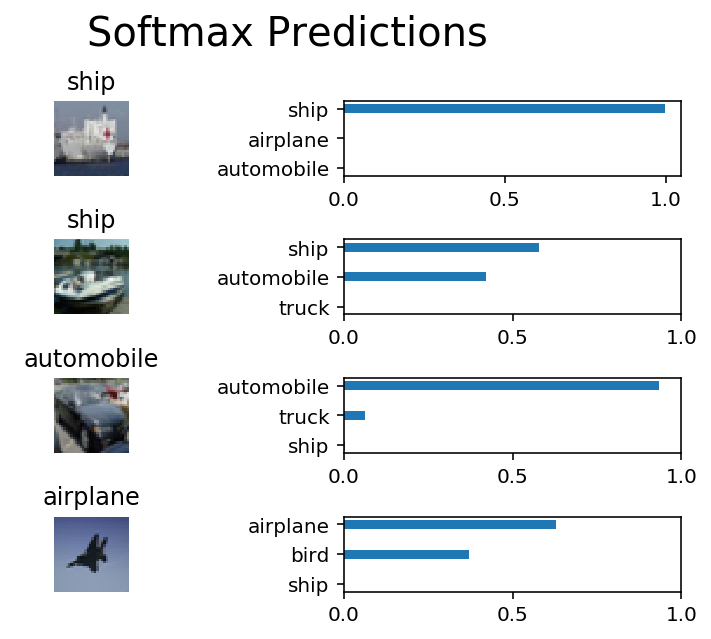

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.